In [87]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt 
import numpy as np
 


In [14]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [51]:
y_train [:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [52]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [37]:
labels = [
"airplane",
"automobile",
"bird",
"cat",
"deer",
"dog",
"frog",
"horse",
"ship",
"truck"]
       
    

In [63]:
def plot_sample(X, y, index):
    plt.figure(figsize = (30,3))
    plt.imshow(X[index])
    plt.xlabel(labels[y[index]])


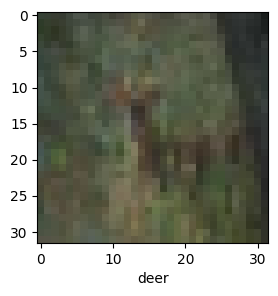

In [64]:
plot_sample(X_train, y_train, 10)

In [40]:
print (labels [2])

bird


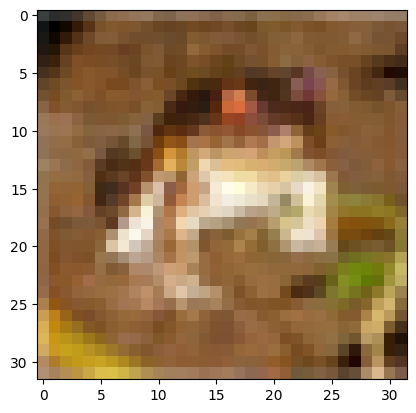

In [35]:
plt.imshow(X_train[0])

In [36]:
print(y_train[0])

[6]


In [57]:
X_train = X_train / 255
X_test = X_test / 255

In [65]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/home/azen/papers/alexnet/.myenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.3005 - loss: 1.9365
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.4205 - loss: 1.6459
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.4554 - loss: 1.5465
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.4769 - loss: 1.4887
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.4986 - loss: 1.4344


In [72]:
cnn = models.Sequential ([
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
     layers.Dense(10, activation='softmax'),
    
])

/home/azen/papers/alexnet/.myenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [73]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [74]:
history = cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3586 - loss: 1.7496
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5920 - loss: 1.1597
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6488 - loss: 1.0092
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6778 - loss: 0.9189
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7066 - loss: 0.8487
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7234 - loss: 0.7980
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7402 - loss: 0.7520
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7552 - loss: 0.7064
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7633 - loss: 0.6766
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7816 - loss: 0.6291
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7950 - loss: 0.5992
Epoch 12/15
1563/1563 ━━━━━

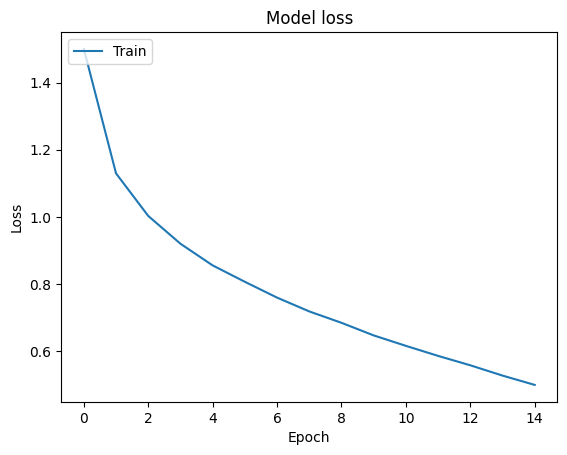

In [82]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [84]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[4.73260786e-03, 5.87088661e-03, 1.07520388e-03, 8.81549478e-01,
        7.78816830e-05, 6.62459359e-02, 8.32988508e-03, 4.01436191e-05,
        2.69256402e-02, 5.15229162e-03],
       [1.21039962e-02, 3.10458034e-01, 3.60607578e-06, 2.46590872e-07,
        5.31101296e-09, 1.73845660e-09, 1.89187084e-08, 2.73904419e-08,
        6.77388489e-01, 4.54960973e-05],
       [5.82422726e-02, 7.59836078e-01, 1.57993915e-03, 1.35335252e-02,
        1.27235893e-03, 2.89889169e-04, 5.10398349e-05, 6.60823379e-03,
        5.43765388e-02, 1.04210198e-01],
       [9.51169252e-01, 1.18539625e-04, 2.80480813e-02, 8.17206455e-05,
        1.18609741e-02, 5.10668997e-07, 5.91111302e-06, 4.97246333e-07,
        8.71381443e-03, 8.40733662e-07],
       [5.95216285e-08, 2.89939794e-06, 4.78102872e-03, 2.06228159e-03,
        9.79565144e-01, 8.18011758e-05, 1.35057420e-02, 3.89868120e-07,
        6.59842556e-07, 7.40410799e-09]], dtype=float32)

TypeError: only integer scalar arrays can be converted to a scalar index

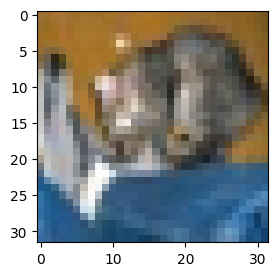

In [85]:
plot_sample(X_test, y_test, 0)

In [90]:
np.argmax(y_pred[0])

3

In [91]:
preds = [np.argmax(yp) for yp in y_pred]

In [95]:
print(preds[:10])

[3, 8, 1, 0, 4, 6, 1, 6, 3, 1]


In [96]:
print(y_test[:10])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [97]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

In [105]:

# Create an AlexNet model
alexnet = models.Sequential([
    # First convolutional layer
    layers.Conv2D(96, kernel_size=(11, 11), strides=(1, 1), padding='valid', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.BatchNormalization(),
    
    # Second convolutional layer
    layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.BatchNormalization(),
    
    # Third convolutional layer
    layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    
    # Fourth convolutional layer
    layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    
    # Fifth convolutional layer
    layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    # Flatten layer
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes for output
])

# Compile the model
alexnet.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Print the summary of the model
alexnet.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 22, 22, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 10, 10, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 10, 10, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 10, 10, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 4, 4, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,623,562 (82.49 MB)

 Trainable params: 21,622,858 (82.48 MB)

 Non-trainable params: 704 (2.75 KB)

In [106]:
history = alexnet.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 214s 136ms/step - accuracy: 0.2405 - loss: 2.0075
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 225s 144ms/step - accuracy: 0.4245 - loss: 1.5787
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 225s 144ms/step - accuracy: 0.5193 - loss: 1.3592
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 246s 134ms/step - accuracy: 0.5763 - loss: 1.2186
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 213s 137ms/step - accuracy: 0.6126 - loss: 1.1065
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 215s 138ms/step - accuracy: 0.6466 - loss: 1.0063
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 288s 184ms/step - accuracy: 0.6756 - loss: 0.9369
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 216s 138ms/step - accuracy: 0.7015 - loss: 0.8657
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 216s 138ms/step - accuracy: 0.7229 - loss: 0.7986
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 224s 143ms/step - accuracy: 0.7463 - loss: 0.7354
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 221s 142ms/step - accuracy: 0.7675 -

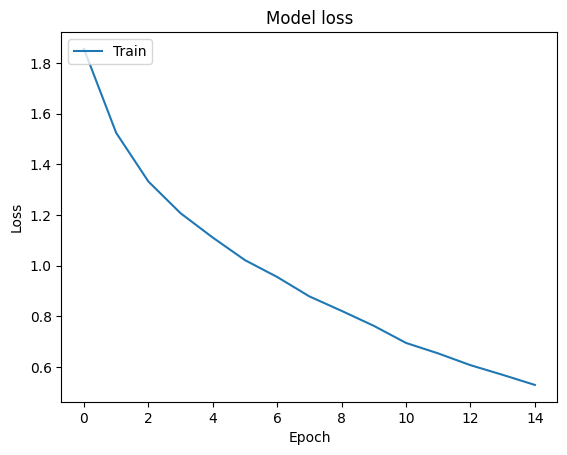

In [107]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
